# Proyecto Properatio: Análisis exploratorio y Preparación de datos



Preparación de datos para entrenar un modelo de predicción del valor de las propiedades en Argentina.<br>

Creado por: Adriana Villalobos

## 1. Importación de librerías y Carga del dataset

In [605]:
import pandas as pd
from funpymodeling.exploratory import freq_tbl, status
import numpy as np

In [606]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "entrenamiento.csv"

# Load the latest version
df_raw = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "alejandroczernikier/properati-argentina-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


In [607]:
df_raw.head(1)

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price
0,556713,Propiedad,2019-11-29,9999-12-31,2019-11-29,-58.442399,-34.573623,Argentina,Capital Federal,Colegiales,NaN,NaN,NaN,3.0,2.0,2.0,NaN,NaN,USD,NaN,"Departamento en Venta en Belgrano, Capital fed...","Sup total por escritura: 96,47 m2 (cubiertos: ...",Departamento,Venta,259000.0


### Inspección inicial

In [608]:
pd.set_option('display.max_columns', None)

In [609]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992192 entries, 0 to 992191
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               992192 non-null  int64  
 1   ad_type          992192 non-null  object 
 2   start_date       992192 non-null  object 
 3   end_date         992192 non-null  object 
 4   created_on       992192 non-null  object 
 5   lat              838994 non-null  float64
 6   lon              839929 non-null  float64
 7   l1               992192 non-null  object 
 8   l2               992192 non-null  object 
 9   l3               934737 non-null  object 
 10  l4               225395 non-null  object 
 11  l5               4711 non-null    object 
 12  l6               0 non-null       float64
 13  rooms            503045 non-null  float64
 14  bedrooms         390699 non-null  float64
 15  bathrooms        773021 non-null  float64
 16  surface_total    448164 non-null  floa

In [610]:
df_raw.shape

(992192, 25)

In [611]:
status(df_raw)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,id,0,0.000000,0,0.000000,992192,int64
1,ad_type,0,0.000000,0,0.000000,1,object
2,start_date,0,0.000000,0,0.000000,346,object
3,end_date,0,0.000000,0,0.000000,450,object
4,created_on,0,0.000000,0,0.000000,346,object
5,lat,153198,0.154404,0,0.000000,317046,float64
6,lon,152263,0.153461,0,0.000000,315745,float64
7,l1,0,0.000000,0,0.000000,4,object
8,l2,0,0.000000,0,0.000000,42,object
9,l3,57455,0.057907,0,0.000000,1262,object


In [612]:
# busco duplicados, imprimo el total y los elimino
print(f"Total de duplicados: {df_raw.duplicated().sum()}")
df_raw = df_raw.drop_duplicates()

Total de duplicados: 0


In [613]:
df_raw[['l1', 'l2', 'l3', 'l4','l5']].sample(10)

,l1,l2,l3,l4,l5
237833,Argentina,Capital Federal,Villa Urquiza,NaN,NaN
648895,Argentina,Buenos Aires Costa Atlántica,Santa Teresita,NaN,NaN
95020,Argentina,Buenos Aires Costa Atlántica,Miramar,NaN,NaN
912050,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,La Plata,NaN
546455,Argentina,Santa Fe,Rosario,NaN,NaN
932088,Argentina,Córdoba,NaN,NaN,NaN
702765,Argentina,Santa Fe,Rosario,NaN,NaN
824367,Argentina,Córdoba,Anisacate,NaN,NaN
613635,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Villa Rosa,NaN
486517,Argentina,Bs.As. G.B.A. Zona Sur,Lomas de Zamora,NaN,NaN


Entendiendo las columnas del l1 al l5: Vemos que es la especificidad del lugar. Aquí vamos a aplicar el primer filtro y quedarnos con una sola localidad de Argentina

In [614]:
df_raw['l2'].value_counts().head(10)

l2
Capital Federal                 249738
Buenos Aires Costa Atlántica    178712
Bs.As. G.B.A. Zona Norte        127510
Bs.As. G.B.A. Zona Sur          112975
Santa Fe                         93111
Bs.As. G.B.A. Zona Oeste         73172
Córdoba                          60877
Buenos Aires Interior            22280
Mendoza                          11558
Neuquén                          10642
Name: count, dtype: int64

Dado que es sabido que Capital Federal tiene el valor por metro cuadrado más alto del país y hay una cantidad de registros mayor, vamos a quedarnos solo con esa localidad para hacer un análisis y predicciones más acotados.

In [615]:
# Crea un nuevo dataframe filtrado por 'Capital Federal'
df = df_raw[df_raw['l2'] == 'Capital Federal'].copy()

In [616]:
# Elimino las columnas que no me aportan valor para el análisis por ser texto libre, identificadores o fechas
cols_to_drop = ['id', 'ad_type', 'end_date', 'created_on',  'title', 'description',
                'l1', 'l2', 'l3', 'l4', 'l5', 'l6']
df.drop(columns=cols_to_drop, inplace=True)
df.head(1)

,start_date,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,property_type,operation_type,price
0,2019-11-29,-58.442399,-34.573623,3.0,2.0,2.0,NaN,NaN,USD,NaN,Departamento,Venta,259000.0


In [617]:
status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,start_date,0,0.000000,0,0.000000,346,object
1,lat,32155,0.128755,0,0.000000,72664,float64
2,lon,32033,0.128266,0,0.000000,71703,float64
3,rooms,78289,0.313485,0,0.000000,32,float64
4,bedrooms,127386,0.510079,4692,0.018788,65,float64
5,bathrooms,37245,0.149136,0,0.000000,18,float64
6,surface_total,77958,0.312159,15,0.000060,1737,float64
7,surface_covered,84393,0.337926,0,0.000000,1523,float64
8,currency,8291,0.033199,0,0.000000,2,object
9,price_period,149953,0.600441,0,0.000000,3,object


In [618]:
# Inspección de columas de tipo object baja cardinalidad
print(df['price_period'].value_counts())
print('-' * 20)
print(df['currency'].value_counts())
print('-' * 20)
print(df['property_type'].value_counts())
print('-' * 20)
print(df['operation_type'].value_counts())

price_period
Mensual    99782
Semanal        2
Diario         1
Name: count, dtype: int64
--------------------
currency
USD    180898
ARS     60549
Name: count, dtype: int64
--------------------
property_type
Departamento       155287
Otro                29122
PH                  13672
Local comercial     13657
Oficina             13282
Lote                 9997
Casa                 9305
Cochera              3506
Depósito             1902
Casa de campo           8
Name: count, dtype: int64
--------------------
operation_type
Venta                177111
Alquiler              58861
Alquiler temporal     13766
Name: count, dtype: int64


## 2. Preparación de datos

### 2.1 Selección inicial de columnas

Se eligen las categorías Oficina y Local Comercial para darle al proyecto utilidad empresarial

In [619]:
df = df[df['property_type'].isin(['Oficina', 'Local comercial'])]

In [620]:
print(df.operation_type.value_counts())
print(df.currency.value_counts())

operation_type
Alquiler             15076
Venta                11810
Alquiler temporal       53
Name: count, dtype: int64
currency
USD    14248
ARS    11246
Name: count, dtype: int64


Se excluye la categoría “Alquiler temporario” del conjunto de entrenamiento debido a su baja representatividad (n = 53, ≈ 0.2% del dataset), lo que podría introducir alta varianza y desbalance en el ajuste del modelo.

In [621]:
df = df[df['operation_type'].isin(['Alquiler', 'Venta'])]

### 2.2 Manejo de los valores de precios y diferentes monedas

Para nos descartar los avisos publicados en pesos, los convertimos a dólares usando un dataset de valores históricos de `https://dolarhoy.com/historico-dolar-blue` 

In [622]:
print('Menor Fecha: ', df['start_date'].min())
print('Mayor Fecha: ', df['start_date'].max())

Menor Fecha:  2019-07-04
Mayor Fecha:  2020-07-27


In [623]:
valor_blue = pd.read_csv('../data/dolar_blue_historico_jul19_a_jul20.csv', sep=',', parse_dates=['category'], index_col='category')
# renombrar el indice de category a fecha
valor_blue.rename_axis('Fecha', inplace=True)
valor_blue.head(10)

,valor
Fecha,
2019-07-01,43.45
2019-07-02,43.50
2019-07-03,43.05
2019-07-04,42.90
2019-07-05,42.90
2019-07-10,42.80
2019-07-11,43.20
2019-07-12,43.25
2019-07-15,43.75


El dataset de valor_blue no tiene todos los días, posiblemente por feriados y fines de semana, resolveremos ese problema asignando el valor del día anterios a las fechas faltantes.

In [624]:

fechas_completas = pd.date_range(start=valor_blue.index.min(), end=valor_blue.index.max())

# Reindex the dataframe with the complete date range and forward fill the missing values
valor_blue = valor_blue.reindex(fechas_completas).ffill()
valor_blue.head(10)

,valor
2019-07-01,43.45
2019-07-02,43.50
2019-07-03,43.05
2019-07-04,42.90
2019-07-05,42.90
2019-07-06,42.90
2019-07-07,42.90
2019-07-08,42.90
2019-07-09,42.90
2019-07-10,42.80


In [625]:
valor_blue.describe()

,valor
count,397.000000
mean,83.462972
std,28.002052
min,42.800000
25%,63.000000
50%,77.750000
75%,117.000000
max,139.000000


In [626]:
df[df['currency'] == 'ARS'].head(5)

,start_date,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,property_type,operation_type,price
5727,2019-07-07,-58.478796,-34.624609,NaN,NaN,1.0,32.0,32.0,ARS,NaN,Oficina,Alquiler,12000.0
5728,2019-07-07,-58.456626,-34.626537,NaN,NaN,1.0,62.0,46.0,ARS,NaN,Oficina,Alquiler,15000.0
5729,2019-07-07,-58.434470,-34.578360,NaN,NaN,2.0,140.0,70.0,ARS,NaN,Oficina,Alquiler,54000.0
5741,2019-07-07,-58.374424,-34.608718,NaN,NaN,1.0,30.0,28.0,ARS,NaN,Oficina,Alquiler,8500.0
5783,2019-07-07,-58.422275,-34.590359,NaN,NaN,1.0,21.0,21.0,ARS,NaN,Local comercial,Alquiler,7000.0


In [627]:
# Elimino los datos sin valor de precio
print('Cantidad de rows: ' + str(df.shape[0]))
df = df[df['price'].notna()]

# Elimino los datos con valor 0 de precio
df = df[df['price'] != 0]
print('Cantidad de rows sin 0 ni nulos: ' + str(df.shape[0]))

Cantidad de rows: 26886
Cantidad de rows sin 0 ni nulos: 25453


In [628]:
df['valor_cambio'] = df['start_date'].map(valor_blue['valor'])

df['price_usd'] = np.where(df['currency'] == 'ARS', df['price'] * df['valor_cambio'], df['price'])

In [629]:
df[df['currency'] == 'ARS'].head(5)

,start_date,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,property_type,operation_type,price,valor_cambio,price_usd
5727,2019-07-07,-58.478796,-34.624609,NaN,NaN,1.0,32.0,32.0,ARS,NaN,Oficina,Alquiler,12000.0,42.9,514800.0
5728,2019-07-07,-58.456626,-34.626537,NaN,NaN,1.0,62.0,46.0,ARS,NaN,Oficina,Alquiler,15000.0,42.9,643500.0
5729,2019-07-07,-58.434470,-34.578360,NaN,NaN,2.0,140.0,70.0,ARS,NaN,Oficina,Alquiler,54000.0,42.9,2316600.0
5741,2019-07-07,-58.374424,-34.608718,NaN,NaN,1.0,30.0,28.0,ARS,NaN,Oficina,Alquiler,8500.0,42.9,364650.0
5783,2019-07-07,-58.422275,-34.590359,NaN,NaN,1.0,21.0,21.0,ARS,NaN,Local comercial,Alquiler,7000.0,42.9,300300.0


In [630]:
df.sample(5)

,start_date,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,property_type,operation_type,price,valor_cambio,price_usd
452395,2020-02-17,-58.515396,-34.638977,NaN,NaN,NaN,49.0,NaN,USD,NaN,Local comercial,Venta,250000.0,78.00,250000.0
356464,2019-11-06,-58.434922,-34.590380,NaN,NaN,2.0,104.0,104.0,USD,NaN,Local comercial,Venta,260000.0,65.00,260000.0
85411,2019-08-16,-58.378233,-34.605468,NaN,NaN,4.0,1060.0,1060.0,USD,NaN,Oficina,Alquiler,9000.0,59.00,9000.0
619912,2020-03-19,-58.395661,-34.597362,1.0,0.0,5.0,NaN,NaN,ARS,NaN,Oficina,Alquiler,400000.0,85.50,34200000.0
727248,2020-01-18,-58.376552,-34.604312,1.0,0.0,1.0,NaN,NaN,ARS,NaN,Oficina,Alquiler,13000.0,77.75,1010750.0


Ya no necesitamos las columnas 'price' ni 'currency' ya que tenemos todo llevado a dólares en 'price_usd' y el valor del tipo de cambio

In [631]:
df = df.drop(columns=['price', 'currency'])

In [632]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25453 entries, 5726 to 992135
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_date       25453 non-null  object 
 1   lat              23648 non-null  float64
 2   lon              23678 non-null  float64
 3   rooms            5662 non-null   float64
 4   bedrooms         1932 non-null   float64
 5   bathrooms        19191 non-null  float64
 6   surface_total    21468 non-null  float64
 7   surface_covered  21563 non-null  float64
 8   price_period     10536 non-null  object 
 9   property_type    25453 non-null  object 
 10  operation_type   25453 non-null  object 
 11  valor_cambio     25453 non-null  float64
 12  price_usd        25453 non-null  float64
dtypes: float64(9), object(4)
memory usage: 2.7+ MB


Ya que price_period tiene muchos nulos y hay muchos datos de "Operación" tipo "Venta" con valor "Mensual" que no tiene sentido, la eliminamos, y asumimos que los alquileres son mensuales

In [633]:
df = df.drop('price_period', axis=1)

In [634]:
df.sample(5)

,start_date,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,operation_type,valor_cambio,price_usd
651423,2020-01-24,-58.416168,-34.614028,1.0,0.0,1.0,NaN,NaN,Local comercial,Alquiler,78.5,785000.0
161416,2020-02-10,-58.389889,-34.599559,NaN,NaN,NaN,NaN,NaN,Local comercial,Alquiler,77.0,3850000.0
460916,2019-07-04,-58.393190,-34.595894,NaN,NaN,1.0,100.0,50.0,Local comercial,Alquiler,42.9,3861000.0
80685,2020-06-17,-58.467259,-34.536936,NaN,NaN,1.0,42.0,42.0,Oficina,Venta,124.0,150000.0
573636,2019-08-13,-58.370782,-34.605485,NaN,NaN,NaN,775.0,775.0,Oficina,Alquiler,57.0,9300.0


Ahora nos enfrentamos a propiedades sin latitud, longitud, rooms, bedrooms, bathrooms, surface_total y/o surface_covered, donde desconocemos su ubicación y/o las dimensiones de la propiedad

In [635]:
# Para los datos sin surface_covered tomamos la surface_total y viceversa
df['surface_covered'] = np.where(df['surface_covered'].isna(), df['surface_total'], df['surface_covered'])
df['surface_total'] = np.where(df['surface_total'].isna(), df['surface_covered'], df['surface_total'])

In [636]:
# Para los datos sin rooms tomamos bedrooms
df['rooms'] = np.where(df['rooms'].isna(), df['bedrooms'], df['rooms'])

# Elimino la columna bedrooms porque al tratarse de locales comerciales u oficinas, no aplica
df = df.drop('bedrooms', axis=1)

In [637]:
# Elimino los rows que no tienen ninguno de los siguientes datos:  rooms, bathrooms, surface_total y surface_covered
size_pre = df.shape[0]
print('Tamaño del df antes de eliminar rows con pocos datos: ' + str(size_pre))
df = df.dropna(subset=['rooms', 'bathrooms', 'surface_total', 'surface_covered'], how='all')
size_post = df.shape[0]
print('Tamaño del df despues de eliminar rows con pocos datos: ' + str(size_post))
print('Diferencia: ', size_pre - size_post)


Tamaño del df antes de eliminar rows con pocos datos: 25453
Tamaño del df despues de eliminar rows con pocos datos: 25048
Diferencia:  405


In [638]:
# Ya no necesitamos la columna valor_cambio ni start_date, así que las eliminamos
df = df.drop(['valor_cambio', 'start_date'], axis=1)

In [639]:
df.sample(5)

,lat,lon,rooms,bathrooms,surface_total,surface_covered,property_type,operation_type,price_usd
287792,-58.400276,-34.636525,NaN,2.0,158.0,151.0,Oficina,Venta,316000.0
36936,-58.406937,-34.630680,NaN,1.0,173.0,173.0,Local comercial,Venta,120000.0
751725,-58.420171,-34.621442,1.0,NaN,NaN,NaN,Local comercial,Venta,340000.0
282928,-58.442582,-34.581183,1.0,2.0,86.0,86.0,Oficina,Alquiler,3840000.0
645573,-58.389394,-34.604742,1.0,2.0,NaN,NaN,Local comercial,Venta,400000.0


### 2.3 Discretización de variables numéricas

#### Latitud y longitud

In [640]:
df['lat_cat'], bins_lat_cat = pd.qcut(df['lat'], 10, duplicates="drop", retbins=True)
df['lat_cat'].value_counts().sort_index()

lat_cat
(-71.643, -58.465]    2332
(-58.465, -58.447]    2328
(-58.447, -58.436]    2357
(-58.436, -58.422]    2325
(-58.422, -58.406]    2356
(-58.406, -58.391]    2273
(-58.391, -58.385]    2327
(-58.385, -58.378]    2328
(-58.378, -58.373]    2326
(-58.373, -54.605]    2328
Name: count, dtype: int64

In [641]:
df['lon_cat'], bins_lon_cat = pd.qcut(df['lon'], 10, duplicates="drop", retbins=True)
df['lon_cat'].value_counts().sort_index()

lon_cat
(-40.763999999999996, -34.623]    2333
(-34.623, -34.611]                2368
(-34.611, -34.606]                2293
(-34.606, -34.603]                2336
(-34.603, -34.601]                2325
(-34.601, -34.598]                2331
(-34.598, -34.595]                2388
(-34.595, -34.588]                2274
(-34.588, -34.573]                2334
(-34.573, -26.023]                2328
Name: count, dtype: int64

#### Rooms, bathrooms, surfaces

In [642]:
df.rooms.value_counts().sort_index()

rooms
0.0         8
1.0      3176
2.0       756
3.0       518
4.0       408
5.0       303
6.0       240
7.0       123
8.0        76
9.0        20
10.0       75
11.0       23
12.0       21
13.0        5
14.0        7
15.0        4
16.0        8
17.0        2
20.0        6
21.0        2
22.0        2
23.0        2
24.0        1
26.0        1
27.0        1
30.0        8
31.0        3
40.0        6
48.0        1
55.0        1
57.0        1
72.0        1
100.0       1
114.0       2
115.0       1
128.0       2
129.0       1
130.0       1
147.0       1
153.0       2
154.0       1
156.0       2
160.0       1
290.0       1
Name: count, dtype: int64

In [643]:
# Los valores negativos de 'rooms', 'bathrooms', 'surface_total' y 'surface_covered' no tienen sentido, los cambio a NaN
df.loc[df['rooms'] < 0, 'rooms'] = np.nan
df.loc[df['bathrooms'] < 0, 'bathrooms'] = np.nan
df.loc[df['surface_total'] < 0, 'surface_total'] = np.nan
df.loc[df['surface_covered'] < 0, 'surface_covered'] = np.nan


In [644]:
df.rooms.value_counts().sort_index()


rooms
0.0         8
1.0      3176
2.0       756
3.0       518
4.0       408
5.0       303
6.0       240
7.0       123
8.0        76
9.0        20
10.0       75
11.0       23
12.0       21
13.0        5
14.0        7
15.0        4
16.0        8
17.0        2
20.0        6
21.0        2
22.0        2
23.0        2
24.0        1
26.0        1
27.0        1
30.0        8
31.0        3
40.0        6
48.0        1
55.0        1
57.0        1
72.0        1
100.0       1
114.0       2
115.0       1
128.0       2
129.0       1
130.0       1
147.0       1
153.0       2
154.0       1
156.0       2
160.0       1
290.0       1
Name: count, dtype: int64

In [645]:
df['rooms_cat'], bins_rooms_cat = pd.qcut(df['rooms'], 6, duplicates="drop", retbins=True)
df['rooms_cat'].value_counts().sort_index()

rooms_cat
(-0.001, 1.0]    3184
(1.0, 2.0]        756
(2.0, 4.0]        926
(4.0, 290.0]      959
Name: count, dtype: int64

In [646]:
df.bathrooms.value_counts().sort_index()

bathrooms
1.0     8676
2.0     6768
3.0     1798
4.0      989
5.0      384
6.0      273
7.0       30
8.0       99
9.0       26
10.0      75
11.0       7
12.0      15
14.0       6
15.0       7
16.0       4
17.0       1
18.0      10
20.0      23
Name: count, dtype: int64

In [647]:
df['bathrooms_cat'], bins_bathrooms_cat = pd.qcut(df['bathrooms'], 3, duplicates="drop", retbins=True)
df['bathrooms_cat'].value_counts().sort_index()

bathrooms_cat
(0.999, 2.0]    15444
(2.0, 20.0]      3747
Name: count, dtype: int64

In [648]:
df.surface_total.value_counts().sort_index()

surface_total
1.0        12
4.0         1
5.0         2
6.0        19
7.0         6
           ..
23467.0     1
27580.0     1
30630.0     1
37291.0     1
43765.0     1
Name: count, Length: 1112, dtype: int64

In [649]:
# Ya que una surface_total y surface_covered de 0 no tiene sentido, las cambio a NaN
df.loc[df['surface_total'] == 0, 'surface_total'] = np.nan
df.loc[df['surface_covered'] == 0, 'surface_covered'] = np.nan

In [650]:
df['surface_total_cat'], bins_surface_total_cat = pd.qcut(df['surface_total'], 5, duplicates="drop", retbins=True)
df['surface_total_cat'].value_counts().sort_index()

surface_total_cat
(0.999, 45.0]       4654
(45.0, 87.0]        4342
(87.0, 150.0]       4590
(150.0, 325.0]      4353
(325.0, 43765.0]    4471
Name: count, dtype: int64

In [651]:
df.surface_covered.value_counts().sort_index()

surface_covered
1.0        13
4.0         2
5.0         2
6.0        20
7.0         6
           ..
22270.0     1
22398.0     1
23467.0     1
25800.0     1
37291.0     1
Name: count, Length: 1085, dtype: int64

In [652]:
df['surface_covered_cat'], bins_surface_covered_cat  = pd.qcut(df['surface_covered'], 5, duplicates="drop", retbins=True)
df['surface_covered_cat'].value_counts().sort_index()

surface_covered_cat
(0.999, 43.0]       4486
(43.0, 84.0]        4483
(84.0, 146.4]       4477
(146.4, 310.0]      4501
(310.0, 37291.0]    4463
Name: count, dtype: int64

#### Categorías para nulos

In [653]:
df.sample(5)

,lat,lon,rooms,bathrooms,surface_total,surface_covered,property_type,operation_type,price_usd,lat_cat,lon_cat,rooms_cat,bathrooms_cat,surface_total_cat,surface_covered_cat
382906,-58.416312,-34.639282,NaN,3.0,310.0,310.0,Oficina,Venta,620000.0,"(-58.422, -58.406]","(-40.763999999999996, -34.623]",NaN,"(2.0, 20.0]","(150.0, 325.0]","(146.4, 310.0]"
25866,-58.428850,-34.599961,NaN,NaN,32.0,32.0,Oficina,Alquiler,584350.0,"(-58.436, -58.422]","(-34.601, -34.598]",NaN,NaN,"(0.999, 45.0]","(0.999, 43.0]"
287782,-58.476605,-34.569581,NaN,3.0,141.0,141.0,Local comercial,Venta,500000.0,"(-71.643, -58.465]","(-34.573, -26.023]",NaN,"(2.0, 20.0]","(87.0, 150.0]","(84.0, 146.4]"
970282,-58.408350,-34.586543,1.0,2.0,230.0,203.0,Local comercial,Alquiler,6640000.0,"(-58.422, -58.406]","(-34.588, -34.573]","(-0.001, 1.0]","(0.999, 2.0]","(150.0, 325.0]","(146.4, 310.0]"
685805,-58.422129,-34.589713,NaN,1.0,33.0,33.0,Local comercial,Venta,89000.0,"(-58.436, -58.422]","(-34.595, -34.588]",NaN,"(0.999, 2.0]","(0.999, 45.0]","(0.999, 43.0]"


In [654]:
# Agregamos la categoría desconocido a los intervalos que no tienen valor
df["lat_cat"] = df["lat_cat"].cat.add_categories("desconocido")
df["lat_cat"] = df["lat_cat"].fillna("desconocido")

df["lon_cat"] = df["lon_cat"].cat.add_categories("desconocido")
df["lon_cat"] = df["lon_cat"].fillna("desconocido")

df["rooms_cat"] = df["rooms_cat"].cat.add_categories("desconocido")
df["rooms_cat"] = df["rooms_cat"].fillna("desconocido")

df["bathrooms_cat"] = df["bathrooms_cat"].cat.add_categories("desconocido")
df["bathrooms_cat"] = df["bathrooms_cat"].fillna("desconocido")

df["surface_total_cat"] = df["surface_total_cat"].cat.add_categories("desconocido")
df["surface_total_cat"] = df["surface_total_cat"].fillna("desconocido")

df["surface_covered_cat"] = df["surface_covered_cat"].cat.add_categories("desconocido")
df["surface_covered_cat"] = df["surface_covered_cat"].fillna("desconocido")

In [655]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25048 entries, 5726 to 992135
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   lat                  23280 non-null  float64 
 1   lon                  23310 non-null  float64 
 2   rooms                5825 non-null   float64 
 3   bathrooms            19191 non-null  float64 
 4   surface_total        22410 non-null  float64 
 5   surface_covered      22410 non-null  float64 
 6   property_type        25048 non-null  object  
 7   operation_type       25048 non-null  object  
 8   price_usd            25048 non-null  float64 
 9   lat_cat              25048 non-null  category
 10  lon_cat              25048 non-null  category
 11  rooms_cat            25048 non-null  category
 12  bathrooms_cat        25048 non-null  category
 13  surface_total_cat    25048 non-null  category
 14  surface_covered_cat  25048 non-null  category
dtypes: category(6), floa

#### Eliminación de columnas discretizadas

In [656]:
df = df.drop(columns=['lat', 'lon', 'rooms', 'bathrooms', 'surface_total', 'surface_covered'])

In [657]:
freq_tbl(df)

     property_type  frequency  percentage  cumulative_perc
0          Oficina      12634    0.504392         0.504392
1  Local comercial      12414    0.495608         1.000000

----------------------------------------------------------------

  operation_type  frequency  percentage  cumulative_perc
0       Alquiler      14047    0.560803         0.560803
1          Venta      11001    0.439197         1.000000

----------------------------------------------------------------

               lat_cat  frequency  percentage  cumulative_perc
0   (-58.447, -58.436]       2357    0.094099         0.094099
1   (-58.422, -58.406]       2356    0.094059         0.188159
2   (-71.643, -58.465]       2332    0.093101         0.281260
3   (-58.465, -58.447]       2328    0.092942         0.374202
4   (-58.385, -58.378]       2328    0.092942         0.467143
5   (-58.373, -54.605]       2328    0.092942         0.560085
6   (-58.391, -58.385]       2327    0.092902         0.652986
7   (-58.378, 

In [658]:
from ydata_profiling import ProfileReport

ProfileReport(df, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:00<00:00, 1143.87it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 2.4 Categorización de operation_type

In [659]:
df['operation_type'] = df['operation_type'].astype('category')

In [660]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25048 entries, 5726 to 992135
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   property_type        25048 non-null  object  
 1   operation_type       25048 non-null  category
 2   price_usd            25048 non-null  float64 
 3   lat_cat              25048 non-null  category
 4   lon_cat              25048 non-null  category
 5   rooms_cat            25048 non-null  category
 6   bathrooms_cat        25048 non-null  category
 7   surface_total_cat    25048 non-null  category
 8   surface_covered_cat  25048 non-null  category
dtypes: category(7), float64(1), object(1)
memory usage: 759.9+ KB


Ahora estamos listos para hacer One Hot Encoding

### 2.5 One Hot Encoding

In [661]:
df = pd.get_dummies(df, columns=['operation_type', 'lat_cat', 'lon_cat', 'rooms_cat', 'bathrooms_cat', 'surface_total_cat', 'surface_covered_cat', 'property_type'])

In [662]:
df.head()

,price_usd,operation_type_Alquiler,operation_type_Venta,"lat_cat_(-71.643, -58.465]","lat_cat_(-58.465, -58.447]","lat_cat_(-58.447, -58.436]","lat_cat_(-58.436, -58.422]","lat_cat_(-58.422, -58.406]","lat_cat_(-58.406, -58.391]","lat_cat_(-58.391, -58.385]","lat_cat_(-58.385, -58.378]","lat_cat_(-58.378, -58.373]","lat_cat_(-58.373, -54.605]",lat_cat_desconocido,"lon_cat_(-40.763999999999996, -34.623]","lon_cat_(-34.623, -34.611]","lon_cat_(-34.611, -34.606]","lon_cat_(-34.606, -34.603]","lon_cat_(-34.603, -34.601]","lon_cat_(-34.601, -34.598]","lon_cat_(-34.598, -34.595]","lon_cat_(-34.595, -34.588]","lon_cat_(-34.588, -34.573]","lon_cat_(-34.573, -26.023]",lon_cat_desconocido,"rooms_cat_(-0.001, 1.0]","rooms_cat_(1.0, 2.0]","rooms_cat_(2.0, 4.0]","rooms_cat_(4.0, 290.0]",rooms_cat_desconocido,"bathrooms_cat_(0.999, 2.0]","bathrooms_cat_(2.0, 20.0]",bathrooms_cat_desconocido,"surface_total_cat_(0.999, 45.0]","surface_total_cat_(45.0, 87.0]","surface_total_cat_(87.0, 150.0]","surface_total_cat_(150.0, 325.0]","surface_total_cat_(325.0, 43765.0]",surface_total_cat_desconocido,"surface_covered_cat_(0.999, 43.0]","surface_covered_cat_(43.0, 84.0]","surface_covered_cat_(84.0, 146.4]","surface_covered_cat_(146.4, 310.0]","surface_covered_cat_(310.0, 37291.0]",surface_covered_cat_desconocido,property_type_Local comercial,property_type_Oficina
5726,32000.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True
5727,514800.0,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True
5728,643500.0,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True
5729,2316600.0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True
5731,89000.0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True


In [663]:
# Reemplazo los espacios por _ para mantener la consistencia en los nombres de columnas

df.columns = df.columns.str.replace(' ', '_', regex=False)

# Paso todos los nombres de columnas a lowercase

df.columns = df.columns.str.lower()

In [664]:
df.columns

Index(['price_usd', 'operation_type_alquiler', 'operation_type_venta',
       'lat_cat_(-71.643,_-58.465]', 'lat_cat_(-58.465,_-58.447]',
       'lat_cat_(-58.447,_-58.436]', 'lat_cat_(-58.436,_-58.422]',
       'lat_cat_(-58.422,_-58.406]', 'lat_cat_(-58.406,_-58.391]',
       'lat_cat_(-58.391,_-58.385]', 'lat_cat_(-58.385,_-58.378]',
       'lat_cat_(-58.378,_-58.373]', 'lat_cat_(-58.373,_-54.605]',
       'lat_cat_desconocido', 'lon_cat_(-40.763999999999996,_-34.623]',
       'lon_cat_(-34.623,_-34.611]', 'lon_cat_(-34.611,_-34.606]',
       'lon_cat_(-34.606,_-34.603]', 'lon_cat_(-34.603,_-34.601]',
       'lon_cat_(-34.601,_-34.598]', 'lon_cat_(-34.598,_-34.595]',
       'lon_cat_(-34.595,_-34.588]', 'lon_cat_(-34.588,_-34.573]',
       'lon_cat_(-34.573,_-26.023]', 'lon_cat_desconocido',
       'rooms_cat_(-0.001,_1.0]', 'rooms_cat_(1.0,_2.0]',
       'rooms_cat_(2.0,_4.0]', 'rooms_cat_(4.0,_290.0]',
       'rooms_cat_desconocido', 'bathrooms_cat_(0.999,_2.0]',
       'bathrooms

## 3. Detección y manejo de outliers de price_usd

In [665]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.ticker import MaxNLocator, FuncFormatter

In [666]:

# Formateador de dinero en K (miles), M (millones), B (billones) para gráficos
def smart_money_formatter(x, pos):
    """
    Formatea valores numéricos a K (miles), M (millones), B (billones)
    sin notación científica.
    """
    if abs(x) >= 1_000_000_000:
        return f'{x/1_000_000_000:.1f}B'
    elif abs(x) >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif abs(x) >= 1_000:
        return f'{x/1_000:.0f}K'
    else:
        return f'{x:.0f}'

In [667]:
len(df.price_usd.unique())

5928

In [668]:
df['price_usd'].describe().apply(lambda x: f"{x:,.0f}")

count           25,048
mean         4,254,178
std         65,497,647
min                101
25%            115,000
50%            550,000
75%          2,540,000
max      7,224,045,242
Name: price_usd, dtype: object

Ya que los valores de precio_usd son tan variados y asímétricos (cola larga a la derecha, con valores desorbitados), aplico una escala logarítmica para confirmar la forma real de la distribución

In [671]:
# Preparación de datos para gráficos
df['price_usd_log'] = np.log1p(df['price_usd'])
categories = ['operation_type_venta', 'operation_type_alquiler']

/Users/cosmos/Adri/Developer/DataScience/Clases y Consignas/Proyecto Final/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cosmos/Adri/Developer/DataScience/Clases y Consignas/Proyecto Final/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/cosmos/Adri/Developer/DataScience/Clases y Consignas/Proyecto Final/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,

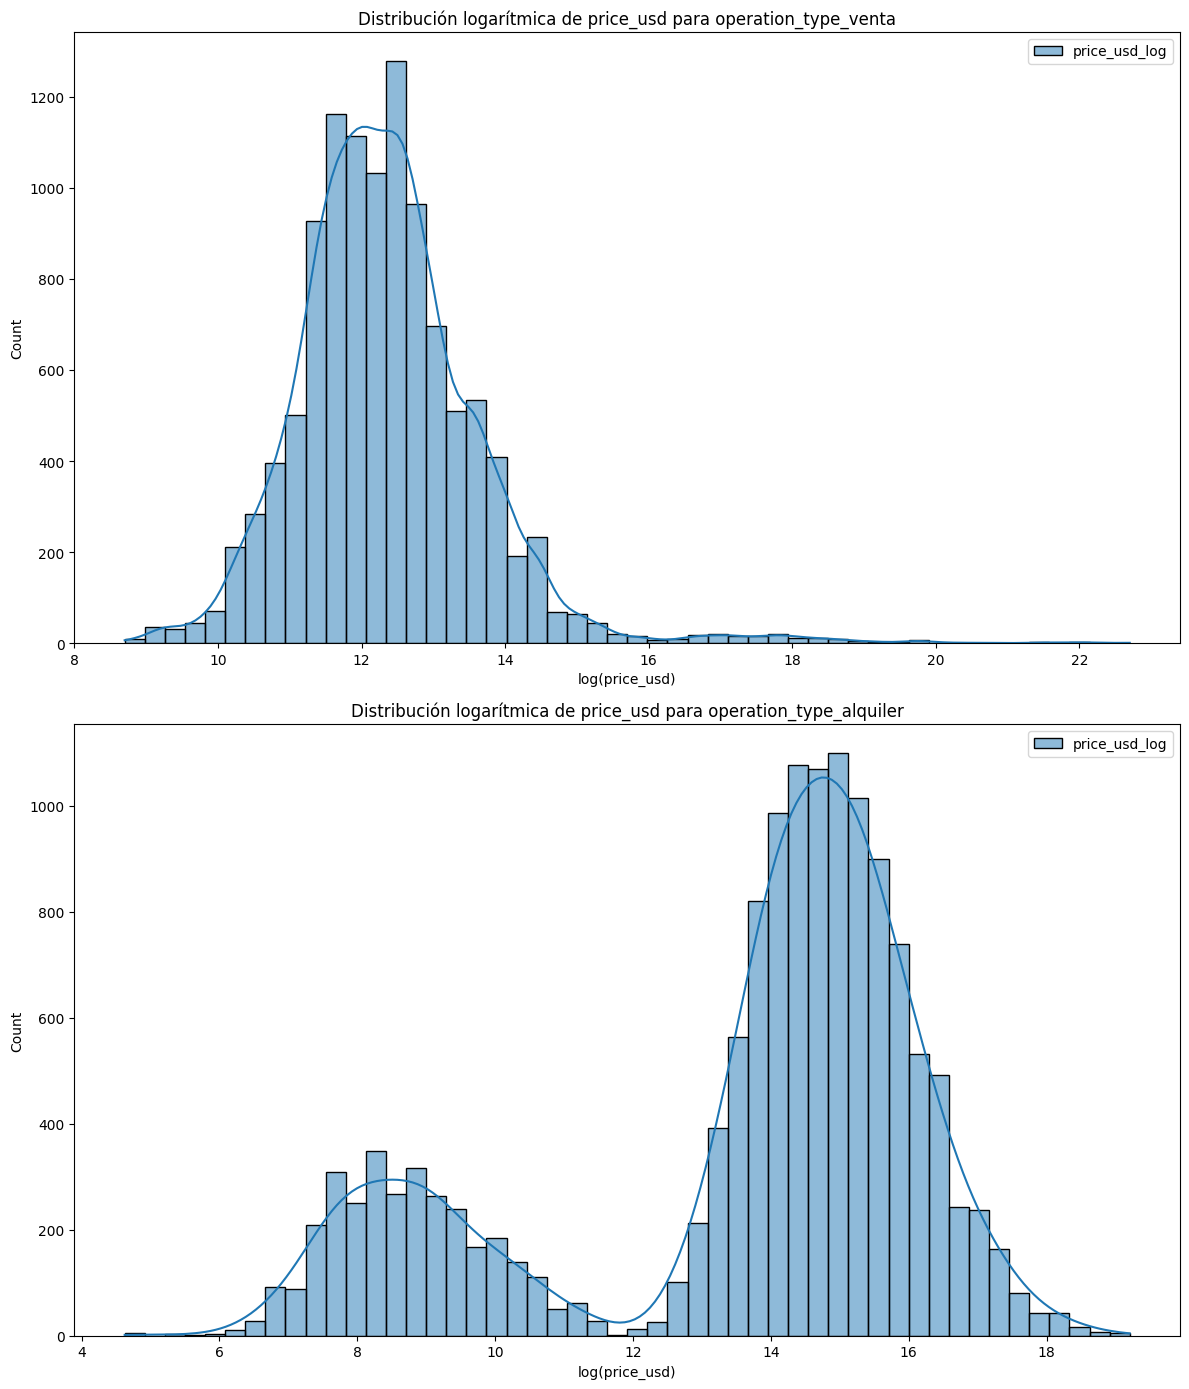

In [672]:
fig, axes = plt.subplots(len(categories), 1, figsize=(12,14), sharey=False)  # sharey=False

for ax, cat in zip(axes, categories):
    sub_df = df[df[cat] == True]
    sns.histplot(sub_df[['price_usd_log']], bins=50, kde=True, ax=ax)
    ax.set_title(f'Distribución logarítmica de price_usd para {cat}')
    ax.set_xlabel('log(price_usd)')

plt.tight_layout()

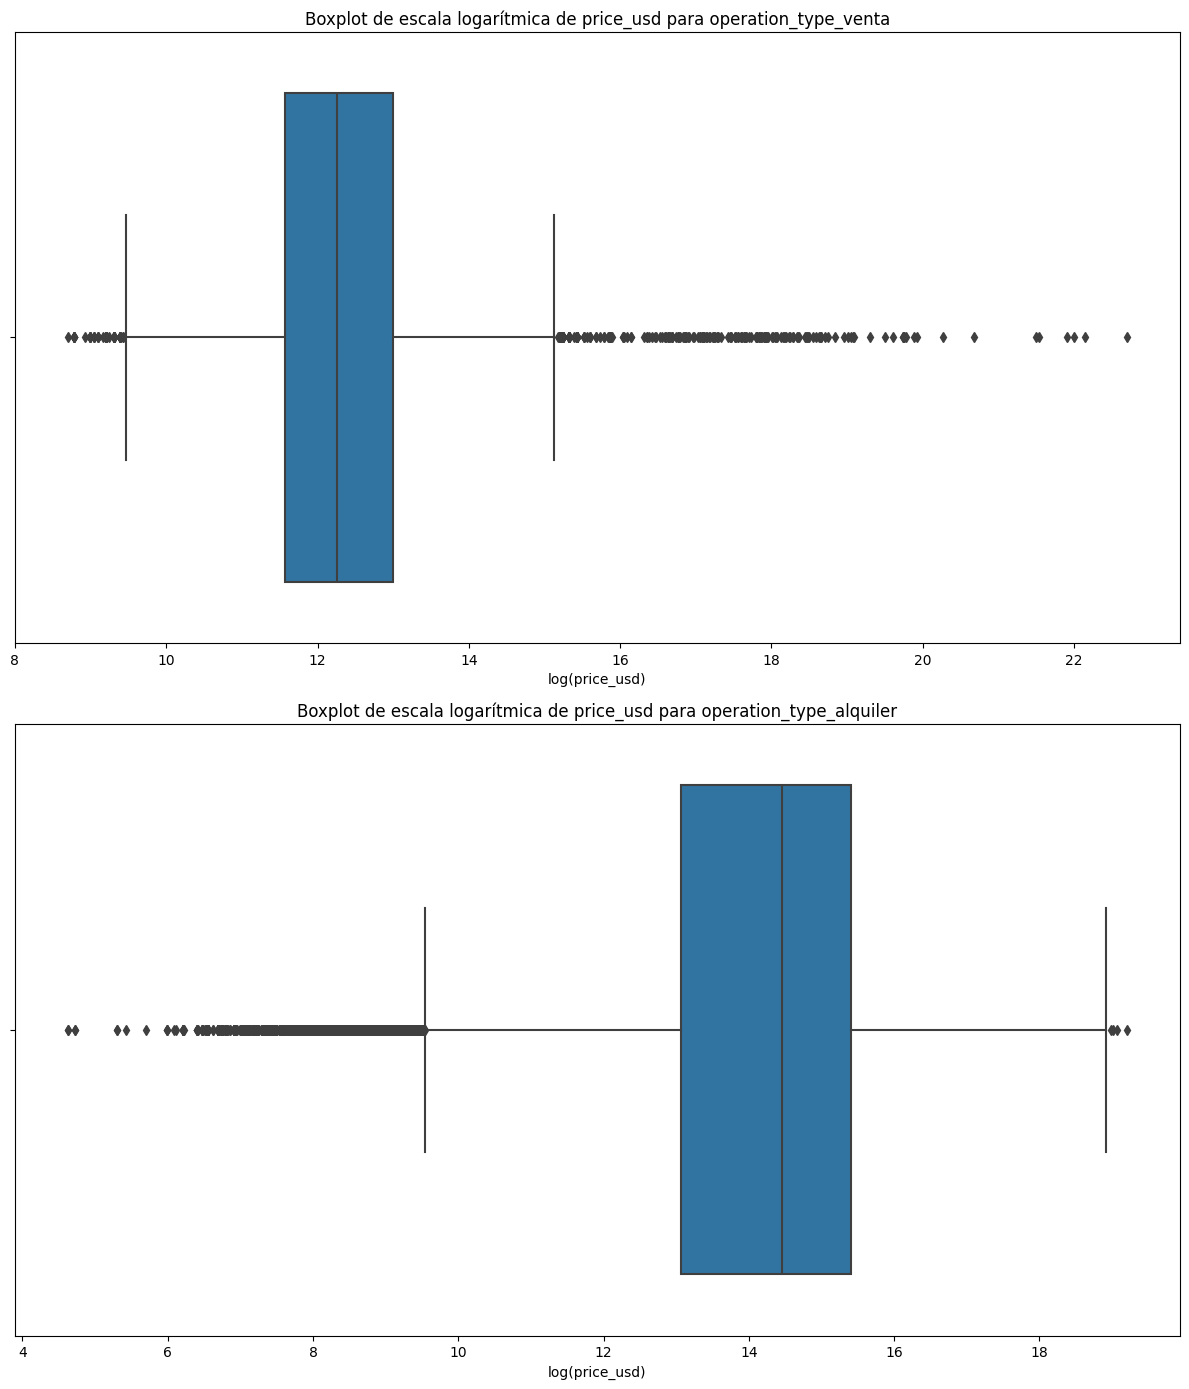

In [673]:
fig, axes = plt.subplots(len(categories), 1, figsize=(12,14), sharey=False)  # sharey=False permite escalas independientes

for ax, cat in zip(axes, categories):
    sub_df = df[df[cat] == True]
    sns.boxplot(x=sub_df['price_usd_log'], ax=ax)
    ax.set_title(f'Boxplot de escala logarítmica de price_usd para {cat}')
    ax.set_xlabel('log(price_usd)')

plt.tight_layout()

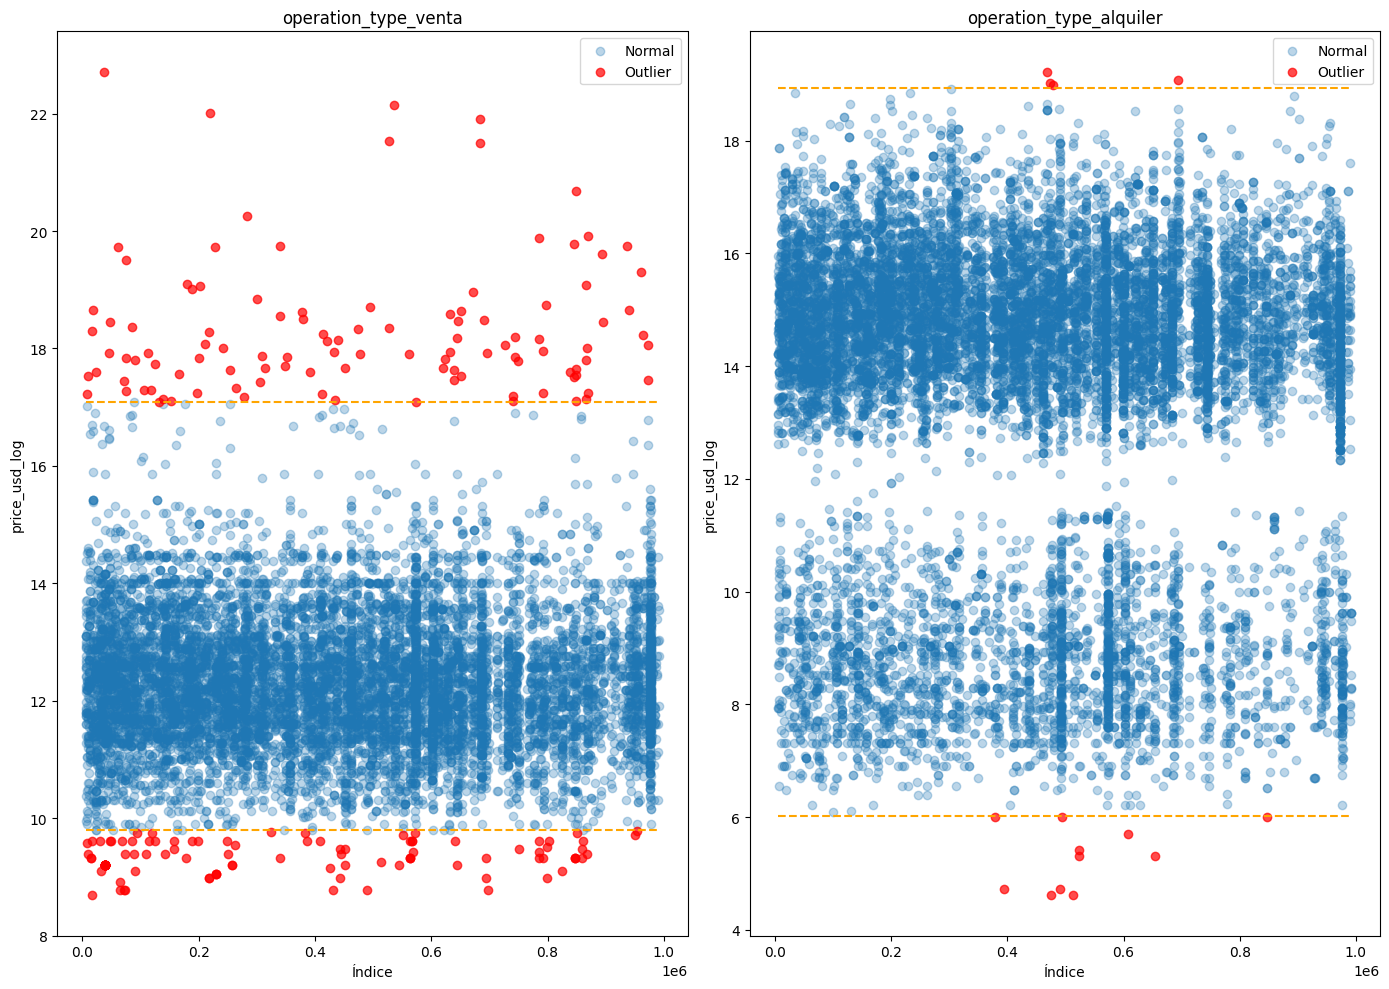

In [691]:
# Filtrado por percentiles ajustado para cada tipo de operación

fig, axes = plt.subplots(1, len(categories), figsize=(14,10), sharey=False)  

for ax, cat in zip(axes, categories):
    sub_df = df[df[cat] == True]
    col_usd= 'price_usd_log'
    if cat == 'operation_type_venta':
        lower = sub_df[col_usd].quantile(0.01)
        upper = sub_df[col_usd].quantile(0.99)
        
    else:
        if cat == 'operation_type_alquiler':
            Q1 = sub_df[col_usd].quantile(0.25)
            Q3 = sub_df[col_usd].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 3*IQR
        upper = Q3 + 1.5*IQR
        
        
    outliers = sub_df[(sub_df[col_usd] < lower) | (sub_df[col_usd] > upper)]
    normal = sub_df[(sub_df[col_usd] >= lower) & (sub_df[col_usd] <= upper)]
    
    ax.scatter(normal.index, normal[col_usd], alpha=0.3, label='Normal')
    ax.scatter(outliers.index, outliers[col_usd], alpha=0.7, color='red', label='Outlier')
    ax.hlines([lower, upper], xmin=sub_df.index.min(), xmax=sub_df.index.max(), colors='orange', linestyles='dashed')
    
    ax.set_title(cat)
    ax.set_xlabel('Índice')
    ax.set_ylabel(col_usd)
    ax.yaxis.set_major_locator(MaxNLocator(nbins=10))
    ax.legend()

plt.tight_layout()
plt.show()


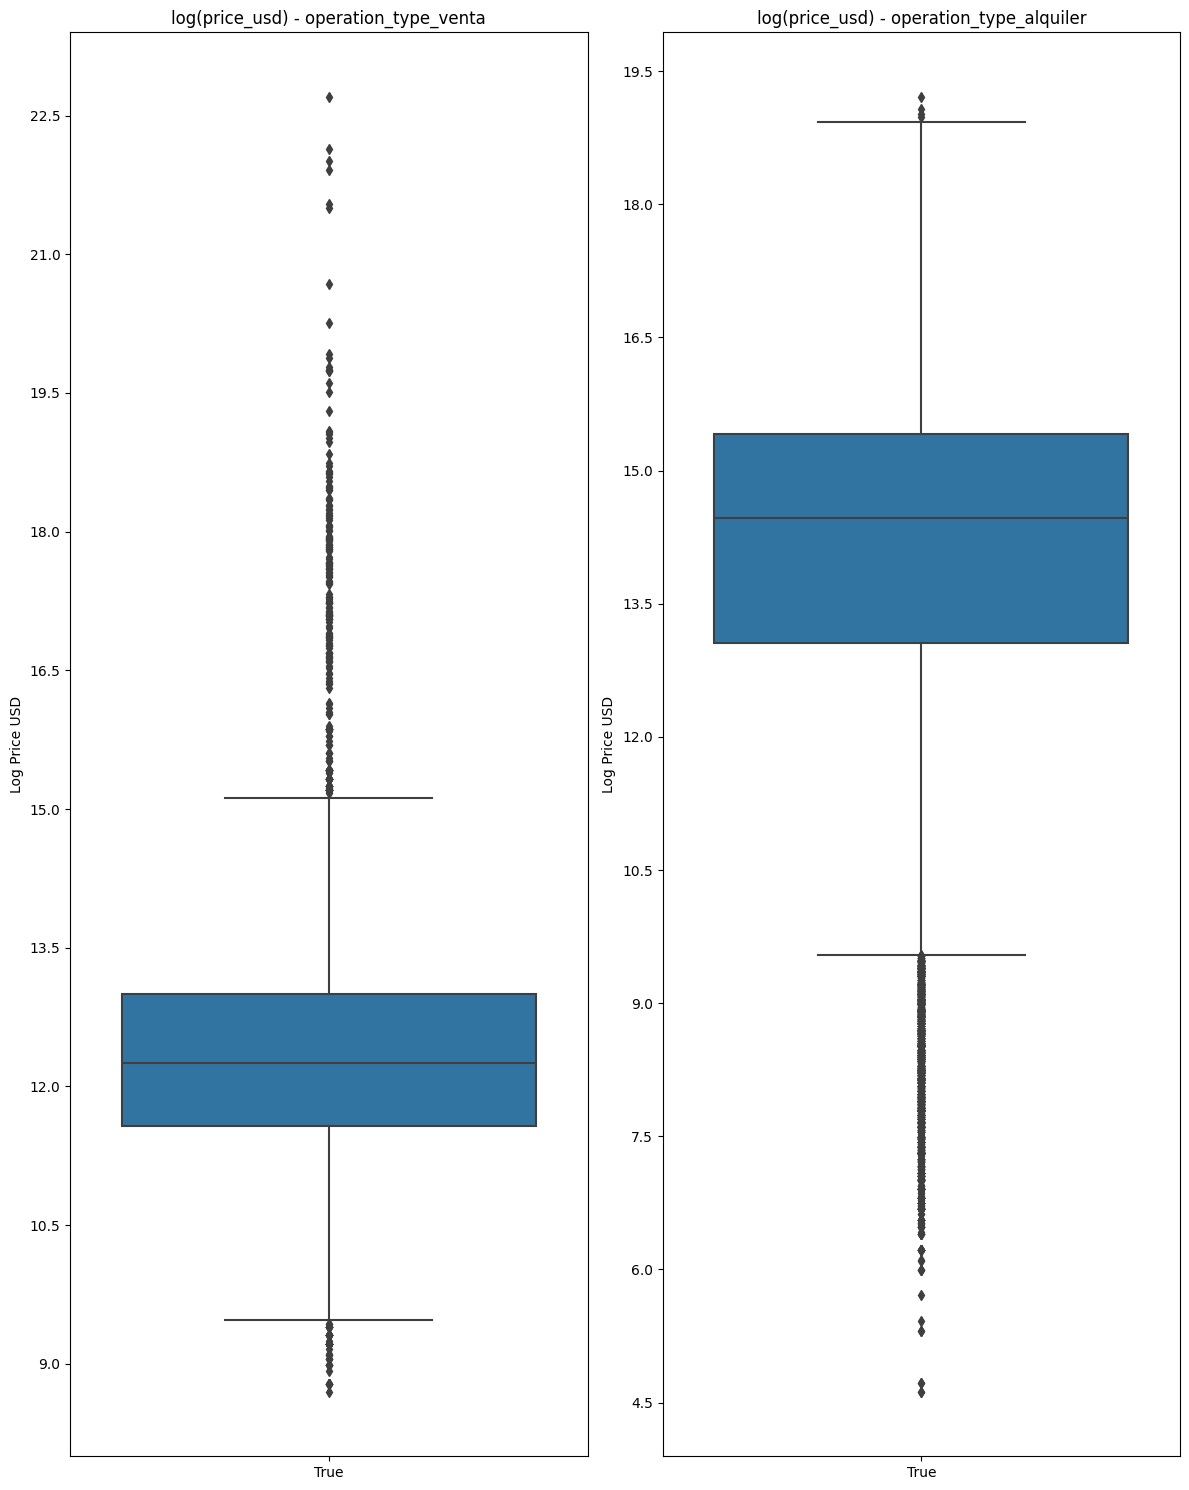

In [675]:

fig, axes = plt.subplots(1, len(categories), figsize=(12,15), sharey=False)  

for ax, cat in zip(axes, categories):
    sns.boxplot(x=cat, y='price_usd_log', data=df[df[cat]==True], ax=ax)
    ax.set_title(f'log(price_usd) - {cat}')
    ax.set_xlabel('')
    ax.set_ylabel('Log Price USD')
    ax.yaxis.set_major_locator(MaxNLocator(nbins=12))

plt.tight_layout()
plt.show()

/Users/cosmos/Adri/Developer/DataScience/Clases y Consignas/Proyecto Final/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


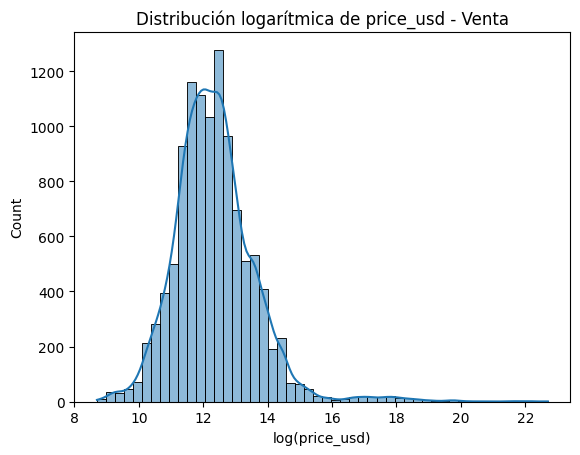

In [694]:
sns.histplot(df[df['operation_type_venta']==True]['price_usd_log'], bins=50, kde=True)
plt.title('Distribución logarítmica de price_usd - Venta')
plt.xlabel('log(price_usd)')
plt.show()

## 4. Guardado de pickles y data procesada

### 4.1 Las columnas de OHE

In [ ]:
import pickle

#si /models no existe, lo creo
import os   
if not os.path.exists('models'):
    os.makedirs('models')

with open('models/categories_ohe.pickle', 'wb') as handle:
    pickle.dump(df.columns, handle, protocol=pickle.HIGHEST_PROTOCOL)

### 4.2 Los bins

In [ ]:
with open('models/bins_surface_covered_cat.pickle', 'wb') as handle:
    pickle.dump(bins_surface_covered_cat, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('models/bins_surface_total_cat.pickle', 'wb') as handle:
    pickle.dump(bins_surface_total_cat, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('models/bins_bathrooms_cat.pickle', 'wb') as handle:
    pickle.dump(bins_bathrooms_cat, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('models/bins_rooms_cat.pickle', 'wb') as handle:
    pickle.dump(bins_rooms_cat, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('models/bins_lat_cat.pickle', 'wb') as handle:
    pickle.dump(bins_lat_cat, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('models/bins_lon_cat.pickle', 'wb') as handle:
    pickle.dump(bins_lon_cat, handle, protocol=pickle.HIGHEST_PROTOCOL)

### 4.3 Dataset procesado

In [ ]:
#si /data no existe, lo creo
import os   
if not os.path.exists('data'):
    os.makedirs('data')

df.to_csv('../data/data_processed.csv', index=False)
